# Logistic Map

## References
* https://en.wikipedia.org/wiki/Logistic_map

## Introduction

Consider the logic eqatuion:
$$
  f(\alpha,x)=\alpha x(1-x).
$$

The iterative equation becomes
$$
  x_{n+1} = f(\alpha, x_n) = \alpha x_n (1-x_n).
$$

We will assume $x$ is restricted to the domain $(0,1)$.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Tasks: Plot the function and find the attractor
* Set $\alpha=0.8$ and choose some initial point $x_0$, iterate $f$ and convince yourself that they all are attracted to zero. It might be helpful to plot $x_n$ v.s. $n$.
* Plot $f$ and the diagonal $y=x$ on the same plot. Are there any fixed-points other than $x=0$?
* Repeat for $\alpha=1.2$, $\alpha=2.8$, $\alpha=3.2$. What happens?

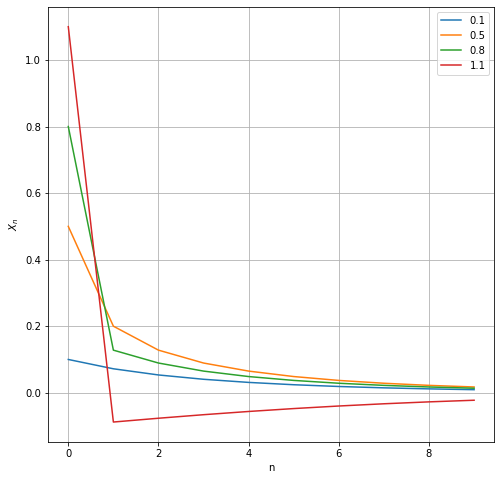

In [38]:
α=0.
N=10
fig ,ax=plt.subplots(figsize=(8,8))
for x in [0.1,0.5,0.8,1.1]:
    xn=x
    xlist,ylist=[],[]
    for i in range(N):
        xn1=α*xn*(1-xn)
        xlist.append(i)
        ylist.append(xn)
        xn=xn1
#   print(xlist,ylist)
    ax.plot(xlist,ylist,'-',label='%.1f'%x)
ax.set_xlabel(r'n')
ax.set_ylabel(r'$X_n$')
ax.grid()
ax.legend()
plt.show()
    


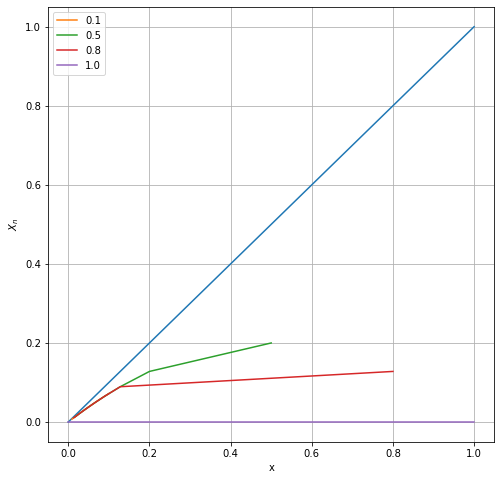

In [48]:
α=0.8
N=10
fig ,ax=plt.subplots(figsize=(8,8))
xlist=np.linspace(0,1,100)
ylist=xlist
ax.plot(xlist,ylist)
for x in [0.1,0.5,0.8,1]:
    xn=x
    xlist,ylist=[],[]
    for i in range(N):
        xn1=α*xn*(1-xn)
        xlist.append(xn)
        ylist.append(xn1)
        xn=xn1
#   print(xlist,ylist)
    ax.plot(xlist,ylist,'-',label='%.1f'%x)
ax.set_xlabel(r'x')
ax.set_ylabel(r'$X_n$')
ax.grid()
ax.legend()
plt.show()

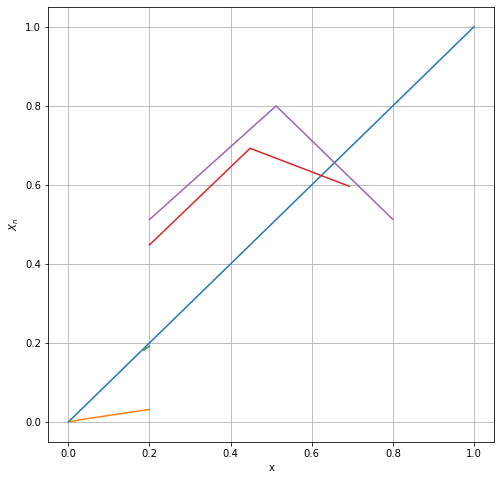

In [52]:

N=3
fig ,ax=plt.subplots(figsize=(8,8))
xlist=np.linspace(0,1,100)
ylist=xlist
ax.plot(xlist,ylist)
for α in [0.2,1.2,2.8,3.2]:
    xn=0.2
    xlist,ylist=[],[]
    for i in range(N):
        xn1=α*xn*(1-xn)
        xlist.append(xn)
        ylist.append(xn1)
        xn=xn1
    ax.plot(xlist,ylist,'-')
ax.set_xlabel(r'x')
ax.set_ylabel(r'$X_n$')
ax.grid()
plt.show()
    

### Tasks: Trajectory of the attractor
* On the same graph, plot $f$, the diagonal $y=x$, and the trajectory $\{x_0, x_0\}$, $\{x_0, f(x_0)\}$, $\{f(x_0), f(x_0)\}$, $\{f(x_0), f(fx_0)\}$, $\dots$ for $\alpha=2.8, 3.2, 3.52, 3.54, 4.00$. Describe their differences.

### Tasks: Bifucation diagram
* Plot the attractor as a function of $\alpha$ for $0<\alpha<4$.

### Tasks: *three cycle*

Consider the case when $\alpha=3.82831$ and $x_0=0.51$. Show that a three cycle occurs with the approximate $x$ values 0.16, 0.52, and 0.96 for the first 80 cycles before the behavior apparently turns chaotic. Find for what iteration that next apparently periodic cycle occurs and for how many cycles it stays periodic?

### Tasks: Feigenbaum number
* Find $\alpha_n$ where n-th bifurcation occurs. 
* Calculate
$$
  \delta_n \equiv \frac{\alpha_n-\alpha_{n-1}}{\alpha_{n+1}-\alpha_n}
$$
and plot $\delta_n$ v.s. $n$. 
* Convince yourself that $\delta_n$ converge to the Feigenbaum number $\delta=4.6692016091029909\dots$.

## Stable, superstable, Lyapunov exponents

For a fixed $\alpha$, define $f^2(x)=f(f(x))$, $f^3=f(f(f(x)))$ etc.

If $x^*$ is a fixed-point (so $f(x^*)=x^*$) then the fixed-point is
* unstable if $ \left| f^\prime(x^*) \right| >1 $.
* stable if $ 0<\left| f^\prime(x^*) \right| <1 $.
* superstable if $ \left| f^\prime(x^*) \right| =0 $.

If $x^*$ is a period-$2^n$ fixed-point (so $f^{2^n}(x^*)=x^*$). It is $2^n$-cycle superstable if $\frac{df^N(x^*)}{dx}=0$. 

Since $f^\prime(1/2)=0$, by the chain rule $ \frac{df^N}{dx} = f^\prime(x_0) f^\prime(x_1) f^\prime(x_2) \dots f^\prime(x_{N-1})$.
one has $\frac{df^N(1/2)}{dx}=0$.

So if $x=1/2$ is a period-$2^n$ fixed-point for some $\alpha$, then $x=1/2$ is $2^n$-cycle superstable for this $\alpha$.

### Use scipy.optimize.brentz to find the root

-1.0
1.0


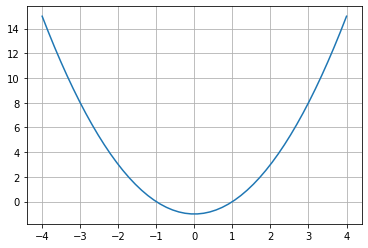

In [2]:
from scipy import optimize

def g(x):
    return (x**2 - 1)
root = optimize.brentq(g, -2, 0)
print(root)
root = optimize.brentq(g, 0, 2)
print(root)

fig, ax = plt.subplots()
x = np.linspace(-4, 4)
ax.plot(x, g(x))
ax.grid()

### Tasks: Superstable
* Find the value of $\alpha_n$ at which the $2^n$-cycle is superstable for the first few values of $n$ as follows:
Define 
$$
  G(\alpha) = f^{2^n}(\alpha, 1/2).
$$
and find the root as a function of $\alpha$. You can use scipy.optimize.brentq to find the roots of a function
* Calculate
$$
  \delta_n \equiv \frac{\alpha_n-\alpha_{n-1}}{\alpha_{n+1}-\alpha_n}
$$
and plot $\delta_n$ v.s. $n$. 
* Convince yourself that $\delta_n$ also converge to the Feigenbaum number $\delta=4.6692016091029909\dots$.

## Tasks: Lyapunov exponents

The Lyapunov exponents $\lambda$ can be obtained as follows:
$$
  \lambda = \lim_{n\rightarrow \infty} \frac{1}{n} \sum_{i=0}^{n-1} \left| \frac{df(x_i)}{dx} \right|
  \approx \frac{1}{n_{\max}} \sum_{i=0}^{n_{max}-1} \left| \frac{df(x_i)}{dx} \right|,
$$
where $n_{max}$ is some large positive integer.

Plot the Lyapunov exponent as a function of $\alpha$ for the logictic map. Note that
* When $\lambda=0$ the bifurcation occurs.
* When $\lambda=-\infty$ it is superstable.
* When $\lambda>0$ it is chaotic.

Does your plot of the Lyapunov exponent agrees with other calculations above?

### Tasks: Another map
* Plot the attractor for the map
$$
  f(x) = B\sin(\pi x)
$$
for $0<B<1$.
* Do the bifurcation diagram appear similar?
* For this map find the superstable $\alpha_n$ and the ratio $\delta_n$. Does $\delta_n$ also converge to the Feigenbaum number $\delta=4.6692016091029909\dots$?